In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen as logp
from rdkit.Chem import rdMolDescriptors as tpsa
from rdkit.Chem import QED as QED

from chainer_chemistry.datasets.molnet import get_molnet_dataset

In [4]:
# put csvfile name here
#csv_filename = 'Initial_training_510dftSampled.csv'
csv_filename = './../../../experiments/regular/Feature_generation/Initial_training.csv'
gen_SMILES_data = pd.read_csv(csv_filename)


In [5]:
gen_SMILES_data.shape

(6152, 2)

In [6]:
gen_SMILES = []
gen_gap = []
for s in gen_SMILES_data['SMILES'].values:
    gen_SMILES.append(s)

# if the file has DFT use that value, if not desired values
try:
    for h in gen_SMILES_data['DFT_gap'].values:
        gen_gap.append(h)
except:
    for h in gen_SMILES_data['pred_gap'].values:
        gen_gap.append(h)

#print ("this is output: ", output)
#print ("this is re.sub", re.sub('[\W+\d+H]', '', SMILES[1]))

#print (len(re.sub('[\W+\d+H]', '', SMILES[1])))


coords = []
pure_atoms = []
_3Ds = 0
gen_coords = []
gen_pure_atoms = []
gen_3Ds = 0


valid = []
for i,smiles in enumerate (gen_SMILES):
    try:
     m = AllChem.MolFromSmiles(smiles)
     output = Chem.MolToMolBlock(m)
     if output.split('\n')[1].split()[1]=='3D':
        gen_3Ds += 1

     pure_atom = re.sub('[\W+\d+H]', '', smiles)
     stop = len(pure_atom)
     gen_pure_atoms.append(pure_atom)

     coord = np.array([a.split()[:3] for a in output.split('\n')[4:(4+stop)]]).astype(float)
     gen_coords.append(coord)
     valid.append (i)
    except:
     pass
gen_SMILES = [gen_SMILES[i] for i in valid]
gen_gap = [gen_gap[i] for i in valid]



print ("len(coords_gen) {}, len(gen_SMILES) {}, len(gen_gap) {}, len(gen_pure_atoms) {}".format(len(gen_coords), len(gen_SMILES), len(gen_gap), len(gen_pure_atoms)))
"""
print (coords[1])
with open('coordinates.pickle', 'wb') as f:
    pickle.dump((coords, SMILES, gap, pure_atoms), f)
"""
"""----"""

####

features = {
    'MolWt': Descriptors.MolWt,
    'HeavyAtomCount': Descriptors.HeavyAtomCount,
    'HeavyAtomMolWt': Descriptors.HeavyAtomMolWt,
    'NumHAcceptors': Descriptors.NumHAcceptors,
    'NumHDonors': Descriptors.NumHDonors,
    'NumHeteroatoms': Descriptors.NumHeteroatoms,
    'NumRotatableBonds': Descriptors.NumRotatableBonds,
    'NumValenceElectrons': Descriptors.NumValenceElectrons,
    'NumAromaticRings': Descriptors.NumAromaticRings,
    'NumSaturatedRings': Descriptors.NumSaturatedRings,
    'NumAliphaticRings': Descriptors.NumAliphaticRings,
    'NumRadicalElectrons': Descriptors.NumRadicalElectrons,
    'NumAliphaticCarbocycles': Descriptors.NumAliphaticCarbocycles,
    'NumAliphaticHeterocycles': Descriptors.NumAliphaticHeterocycles,
    'NumAromaticCarbocycles': Descriptors.NumAromaticCarbocycles,
    'NumAromaticHeterocycles': Descriptors.NumAromaticHeterocycles,
    'NumSaturatedCarbocycles': Descriptors.NumSaturatedCarbocycles,
    'NumSaturatedHeterocycles': Descriptors.NumSaturatedHeterocycles, 
    'Logp': logp.MolLogP,
    'TPSA': tpsa.CalcTPSA,
    'QED' : QED.default
}
out_data = {}
for f in features.keys():
    out_data[f] = []

#gap = gap.replace
gen_out_data = {}
for f in features.keys():
    gen_out_data[f] = []

for i, smiles in enumerate(gen_SMILES):

    if (i + 1) % 5000 == 0:
        print('Currently processed: {}/{}'.format(i+1, len(gen_SMILES)))

    m = AllChem.MolFromSmiles(smiles)
    try:
        for k, v in features.items():
            gen_out_data[k].append(v(m))
    except:
        pass

gen_out_data['gap'] = gen_gap

gen_out_data = pd.DataFrame(gen_out_data)

gen_out_data.to_csv('./Features{}.csv'.format("Initial_training"), index = False)


len(coords_gen) 6152, len(gen_SMILES) 6152, len(gen_gap) 6152, len(gen_pure_atoms) 6152
Currently processed: 5000/6152


(array([  2.,  74., 149., 218., 254., 306., 310., 345., 490., 469., 604.,
        669., 498., 363., 381., 235., 278., 182., 217., 108.]),
 array([ 1.57757075,  2.01336254,  2.44915432,  2.88494611,  3.3207379 ,
         3.75652969,  4.19232147,  4.62811326,  5.06390505,  5.49969684,
         5.93548862,  6.37128041,  6.8070722 ,  7.24286399,  7.67865577,
         8.11444756,  8.55023935,  8.98603114,  9.42182292,  9.85761471,
        10.2934065 ]),
 <BarContainer object of 20 artists>)

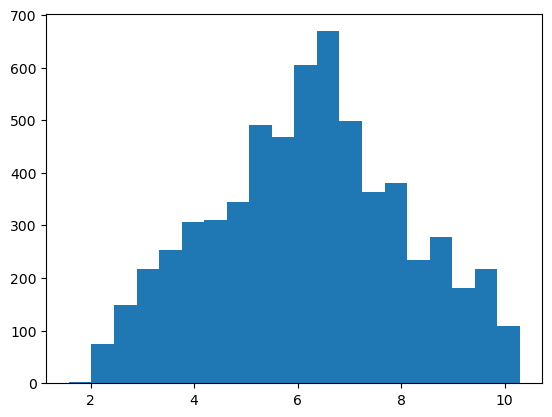

In [7]:
plt.hist (gen_SMILES_data['pred_gap'], bins=20)